In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [6]:
names = ['sepal length', 'sepal width', 'petal lengt', 'petal width', 'class']
data = pd.read_csv("iris.data", names=names)

# Данные

In [7]:
data.head(10)

,sepal length,sepal width,petal lengt,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


# Размерность данных

In [8]:
data.shape

(150, 5)

# Типы данных

In [9]:
data.dtypes

sepal length    float64
sepal width     float64
petal lengt     float64
petal width     float64
class            object
dtype: object

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal lengt   150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Распределение данных по классам

In [11]:
data_class = data.groupby('class').size()
data_class

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

# Описательные статистики

In [13]:
describe = data.describe()
describe

,sepal length,sepal width,petal lengt,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Нету пропусков

# Ассиметрия одномерных распределений

In [14]:
data_without_class=data.drop(columns = ['class'],axis = 1)

In [15]:
data_without_class.skew()

sepal length    0.314911
sepal width     0.334053
petal lengt    -0.274464
petal width    -0.104997
dtype: float64

Ассиметрии данных не наблюдается

In [16]:
data_without_class.kurtosis()

sepal length   -0.552064
sepal width     0.290781
petal lengt    -1.401921
petal width    -1.339754
dtype: float64

Близко к нормальному распределению

# Корреляция между признаками

In [18]:
pearson = data_without_class.corr(method='pearson')
pearson

,sepal length,sepal width,petal lengt,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal lengt,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


Корреляция нигде не прослеживается

# Гистограммы

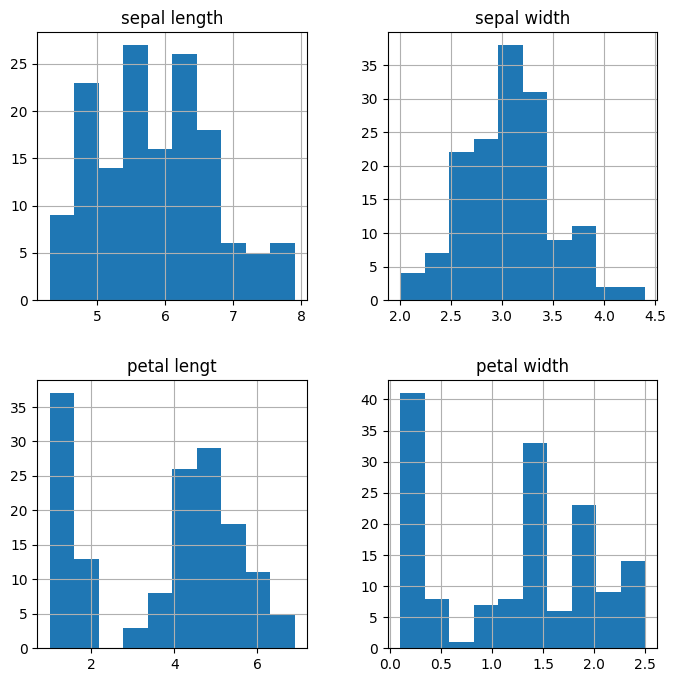

In [19]:
data.hist(figsize=(8,8))
plt.show()

Логнормальное распределение

# Ядерные оценки плотности

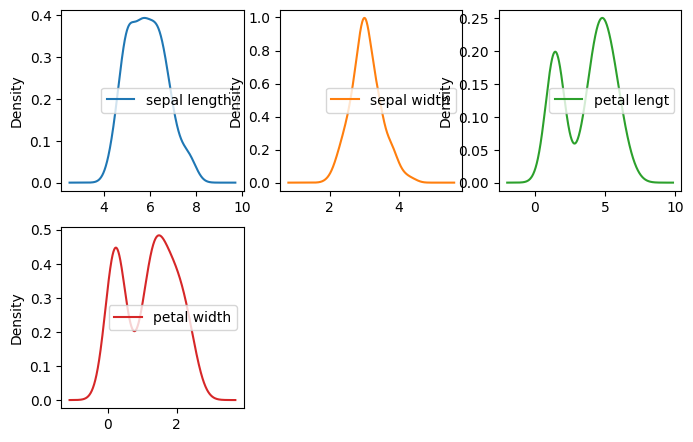

In [20]:
data.plot(kind='kde', subplots=True, layout=(3,3), sharex=False,sharey=False,figsize=(8,8))
plt.show()

Логнормальное распределение

# Яцики с усами

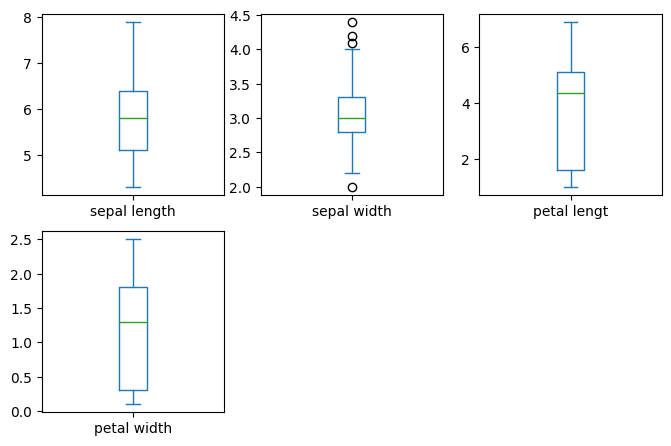

In [21]:
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(8,8))
plt.show()

Логнормальное распределение

# Коррелограмма

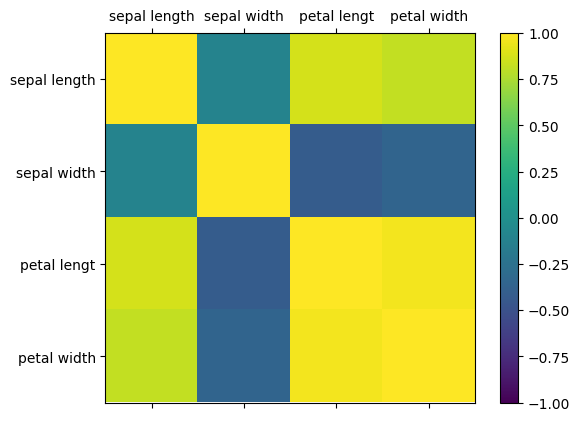

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)
warm = ax.matshow(pearson, vmin=-1, vmax=1)
fig.colorbar(warm)
ticks = np.arange(0,4,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
names2=['sepal length', 'sepal width', 'petal lengt', 'petal width']
ax.set_xticklabels(names2)
ax.set_yticklabels(names2)
plt.show()

Можно увидеть зависимоть между petal width и petal lengt

# Диаграмма рассеяния

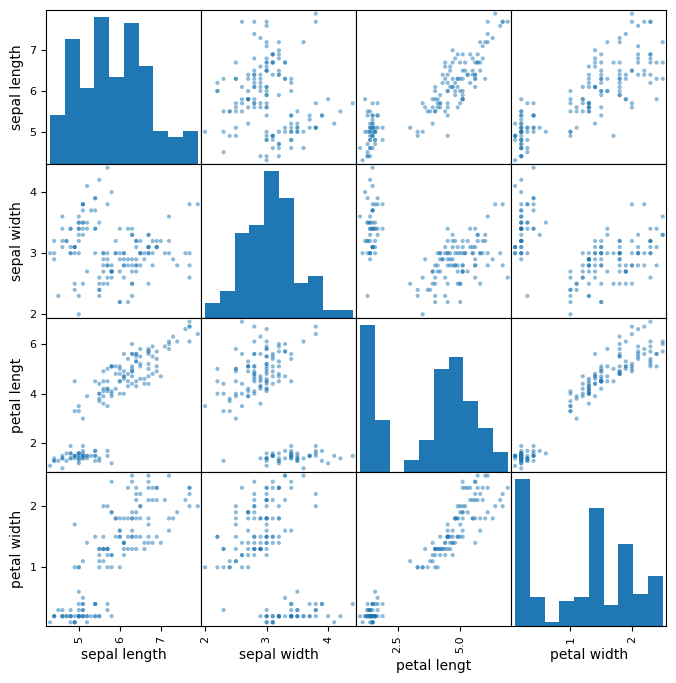

In [23]:
scatter_matrix(data,figsize=(8,8))
plt.show()

Можно увидеть зависимоть между petal width и petal lengt ("линия")